# Approximate PDFs with Parzen window density estimation 

## Get a sample of a distribution

Given a usually unknown probability density function PDF that we aim to approximate. 

We use a Normal distribution $\mathcal{N}(\mu, \sigma)$ in the example below.

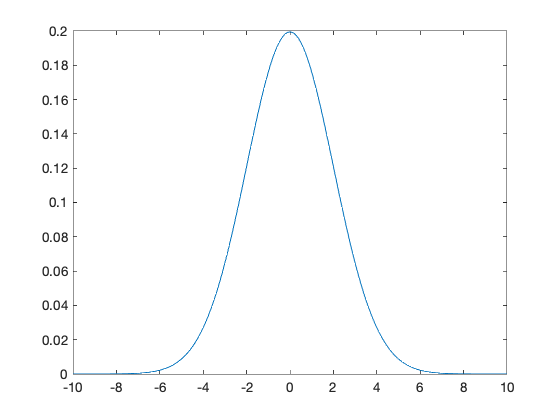

In [1]:
mu = 0;
sigma=2;
dist = makedist('Normal', 'mu',mu,'sigma',sigma);
x = -10:.1:10;
plot(x,pdf(dist,x));

We generate some values of this distribution. These values are observed and make up the training data.

In [2]:
n=100;
for i=1:n
    X(i) = random(dist);
end

# Approximate the sample

We create the approximate PDF `F` in two steps. First, we compute a numeric mapping `f` of a sample of the value range `x` to its probability (density). Then we interpolate `f` with a function `F` so that we can get the probability density even between the sample values.

We start with initializing the approximation mapping `f`.

In [3]:
len_x = length(x);
f = zeros([1 len_x]);

For the approximation, we use a Gaussian Kernal function.

We plot the original distribution again. Then we iterate over different values of the $h$ parameter of the approximation to see its effect by ploting the approximation in the same figure as the distribution.

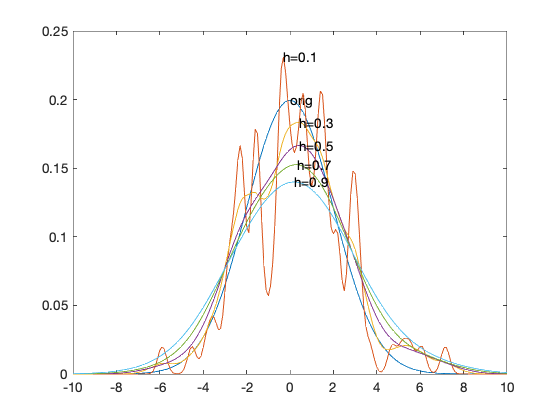

In [4]:
% plot the distribution
plot(x,pdf(dist,x));
text(mu,pdf(dist,mu),'orig');
hold on;
for h = .1:.2:1
    for j=1:len_x
        xx=x(j);
        % Use a Gaussian Kernal function
        for i=1:n
            f(j) = f(j) + normpdf((xx-X(i))/h,mu,sigma);
        end
        f(j) = f(j) /(n*h);
    end
    % plot the approximation in the same figure as the distribution
    plot(x,f);
    [argv,argmax] = max(f);
    i=argmax;
    text(x(i),f(i),['h=',num2str(h)]);
end

We choose $h=0.5$ as a best parameter and repeat the approximation. 

Then we interpolate the approximated samples `f(x)` to get the probability density function `F` applicable to **any** argument in the value range `x`.

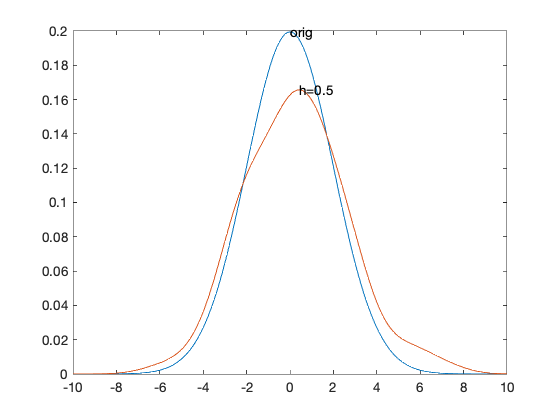

In [5]:
% plot the distribution
plot(x,pdf(dist,x));
text(mu,pdf(dist,mu),'orig');
hold on;
h = .5;
for j=1:len_x
    xx=x(j);
    % Use a Gaussian Kernal function
    for i=1:n
        f(j) = f(j) + normpdf((xx-X(i))/h,mu,sigma);
    end
    f(j) = f(j) /(n*h);
end
% interpolate the approximated function
F = griddedInterpolant(x,f);
% plot the interpolated function in the same figure as the distribution
plot(x,F(x));
[argv,argmax] = max(F(x));
i=argmax;
text(x(i),F(x(i)),['h=',num2str(h)]);

The PDF approximation is now usable in between and outside the range of the sample points, e.g.

In [6]:
p1=F(1.23456)
p2=F(-11)


p1 =

    0.1540


p2 =

  -5.3814e-06


